<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


<span style="font-family:Times New Roman; font-size:16pt">Question 1: For the "Median value of owner-occupied homes" provide a boxplot</span>

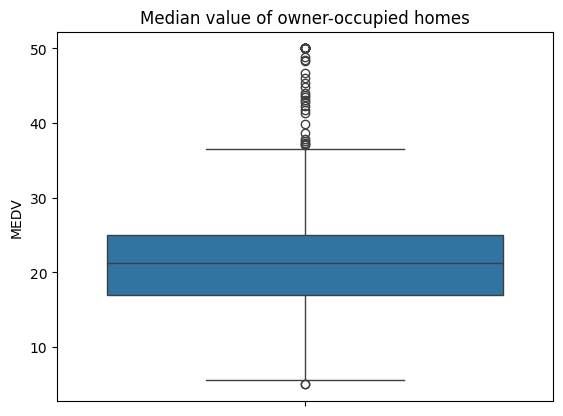

In [10]:
boxplot = sns.boxplot(y='MEDV', data=boston_df)
boxplot.set_title("Median value of owner-occupied homes")
plt.show()

<span style="font-family:Times New Roman; font-size:16pt">Question 2: Provide a  bar plot for the Charles river variable</span> 

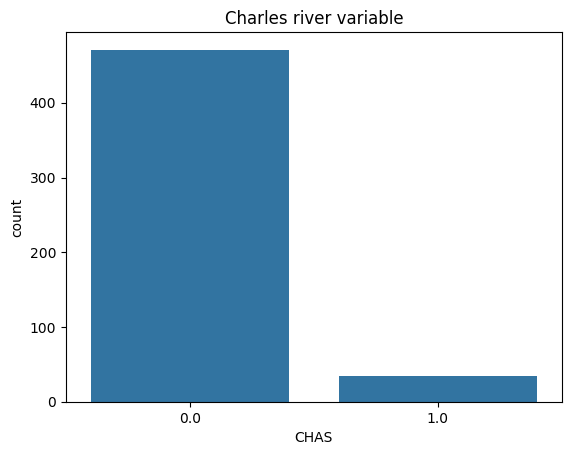

In [23]:
barplot = sns.countplot(x='CHAS', data=boston_df)
barplot.set_title("Charles river variable")
plt.show()

<span style="font-family:Times New Roman; font-size:16pt">Question 3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</span>

In [27]:
age_column = boston_df[['AGE']]
age_column_1 = age_column.loc[age_column['AGE'] <= 35, 'AGE'].reset_index(drop=True)
age_column_2 = age_column.loc[(age_column['AGE'] > 35) & (age_column['AGE'] < 70), 'AGE'].reset_index(drop=True)
age_column_3 = age_column.loc[age_column['AGE'] >= 70, 'AGE'].reset_index(drop=True)

In [44]:
age_group = pd.concat([age_column_1, age_column_2, age_column_3], axis=1)
age_group.columns = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
age_group_df= pd.DataFrame(age_group)

In [29]:
bins = [0, 35, 70, 100]
labels = ['<=35', '35-70', '>=70']
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

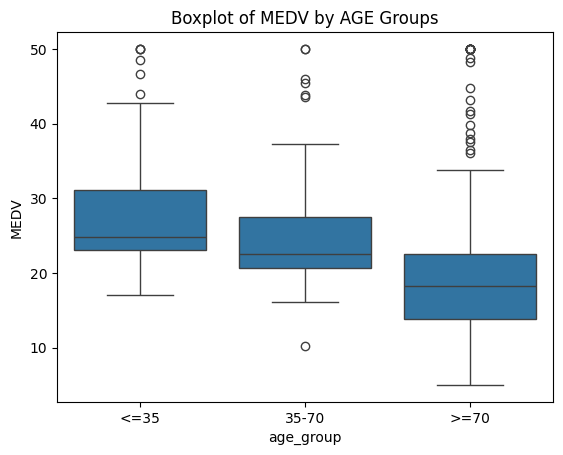

In [30]:
boxplot_2 = sns.boxplot(y='MEDV', x='age_group', data=boston_df)
boxplot_2.set_title("Boxplot of MEDV by AGE Groups")
plt.show()

<span style="font-family:Times New Roman; font-size:16pt">Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</span>

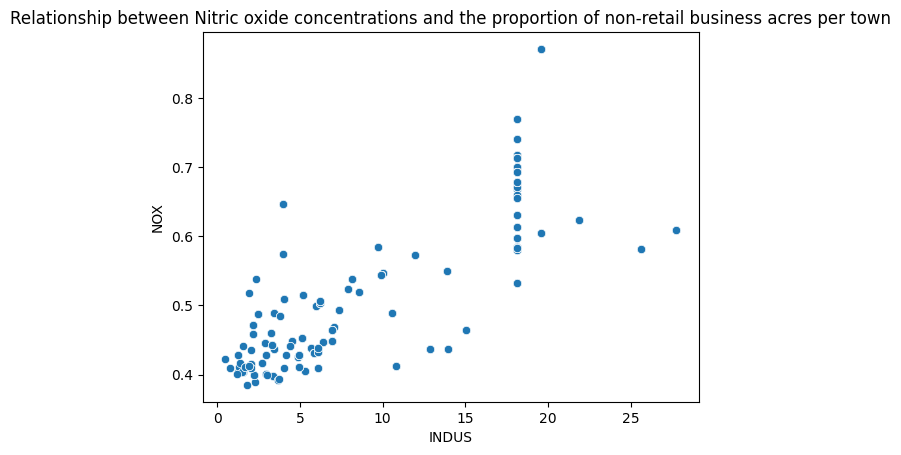

In [16]:
scatterplot = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
scatterplot.set_title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()                  

<span style="font-family:Times New Roman; font-size:12pt">Conclusion: There is a direct proportional relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. This mean, increase in one of the variabe will likely lead to increase in the other variable</span>  

<span style="font-family:Times New Roman; font-size:16pt">Question 5: Create a histogram for the pupil to teacher ratio variable</span>

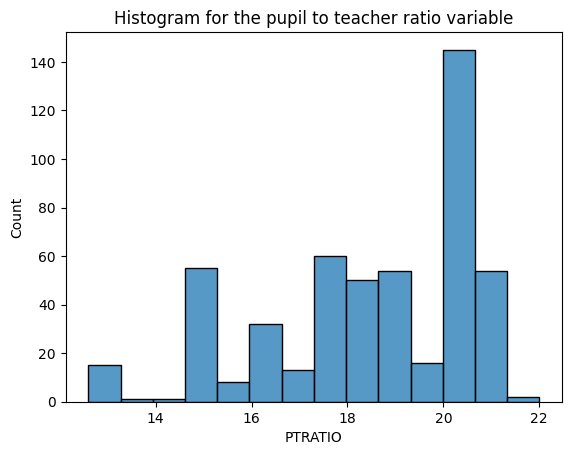

In [89]:
histogram = sns.histplot(x='PTRATIO', data=boston_df)
histogram.set_title("Histogram for the pupil to teacher ratio variable")
plt.show()

<span style="font-family:Times New Roman; font-size:16pt">Question 6: Is there a significant difference in median value of houses bounded by the Charles river or not?</span>

<span style="font-family:Times New Roman; font-size:12pt"> H_0: There is no significant difference in the median value of the houses

<span style="font-family:Times New Roman; font-size:12pt"> H_1: There is a significant difference in the median value of the houses

α=0.05</span>

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']== 0.0]['MEDV'],
                    boston_df[boston_df['CHAS']== 1.0]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<span style="font-family:Times New Roman; font-size:12pt">Conclusion: The p-value is less than 0.05; therefore, there is a significant difference in the median value of houses bounded by the Charles River.</span>

<span style="font-family:Times New Roman; font-size:16pt"> Question 7: Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940</span>

<span style="font-family:Times New Roman; font-size:12pt">First, check for equality of variance

<span style="font-family:Times New Roman; font-size:12pt">H_0: The variances are equal

<span style="font-family:Times New Roman; font-size:12pt">H_1: The variances are not equal

<span style="font-family:Times New Roman; font-size:12pt">α= 0.05</span>

In [37]:
boston_df.loc[(boston_df['AGE'] <= 35), 'median_age_group'] = 'below 35 years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'median_age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'median_age_group'] = 'over 70 years'

In [38]:
thrity_and_below= boston_df[boston_df['median_age_group'] == 'below 35 years']['MEDV']
thirtyfive_to_seventy = boston_df[boston_df['median_age_group'] == 'between 35 and 70 years']['MEDV']
seventy_and_above = boston_df[boston_df['median_age_group'] == 'over 70 years']['MEDV']

In [52]:
scipy.stats.levene(thrity_and_below, thirtyfive_to_seventy, seventy_and_above, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

<span style="font-family:Times New Roman; font-size:12pt">The p_value is greater than 0.05, therefore the variances are equal</span>

<span style="font-family:Times New Roman; font-size:12pt"> Now we test the dataset using F distribution

<span style="font-family:Times New Roman; font-size:12pt"> α= 0.05</span>

In [53]:
f_statistics, p_value= scipy.stats.f_oneway(thrity_and_below, thirtyfive_to_seventy, seventy_and_above)
print('f_statistics: {0}, p_value: {1}'.format(f_statistics, p_value))

f_statistics: 36.40764999196599, p_value: 1.7105011022702984e-15


<span style="font-family:Times New Roman; font-size:12pt">Conclusion: The p_value is less than 0.05, therefore there is a significant difference in Median values of houses for each proportion of owner-occupied units built prior to 1940</span>

<span style="font-family:Times New Roman; font-size:16pt">QUESTION 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?</span>

<span style="font-family:Times New Roman; font-size:12pt">H0: There is no relationship between NOX and INDUS

<span style="font-family:Times New Roman; font-size:12pt">H1: There is a relationship between NOX and INDUS

<span style="font-family:Times New Roman; font-size:12pt">α = 0.05</span>

In [41]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<span style="font-family:Times New Roman; font-size:12pt">Conclusion: The p-value is less than 0.05; therefore, there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?</span>

<span style="font-family:Times New Roman; font-size:16pt"> Question 9: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner-occupied homes?</span>

In [43]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        15:02:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="font-family:Times New Roman; font-size:12pt">Conclusion: The impact is statistically significant. An additional weighted distance to Boston employment centres will increase the median home value by 1.0916 </span>